In [502]:
from tqdm import tqdm
import os
import re
import pandas as pd
import numpy as np
import ast
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold import TSNE
from sklearn import metrics
from collections import Counter

In [3]:
stopwords_list = [
    'ab', 'ac', 'ad', 'adhic', 'aliqui', 'aliquis', 'an', 'ante', 'apud', 'at', 'atque', 'aut', 'autem', 'cum', 'cur',
    'de', 'deinde', 'dum', 'ego', 'enim', 'ergo', 'es', 'est', 'et', 'etiam', 'etsi', 'ex', 'fio', 'haud', 'hic', 'iam',
    'idem', 'igitur', 'ille', 'in', 'infra', 'inter', 'interim', 'ipse', 'is', 'ita', 'magis', 'modo', 'mox', 'nam', 'ne',
    'nec', 'necque', 'neque', 'nisi', 'non', 'nos', 'o', 'ob', 'per', 'possum', 'post', 'pro', 'quae', 'quam', 'quare',
    'qui', 'quia', 'quicumque', 'quidem', 'quilibet', 'quis', 'quisnam', 'quisquam', 'quisque', 'quisquis', 'quo',
    'quoniam', 'sed', 'si', 'sic', 'sive', 'sub', 'sui', 'sum', 'super', 'suus', 'tam', 'tamen', 'trans', 'tu', 'tum',
    'ubi', 'uel', 'uero'
]

In [68]:
def stopwords(liste):
    return [word for word in liste.split() if word not in stopwords_list]
def string_to_list(string_list):
    try:
        # Use ast.literal_eval to safely convert the string to a list
        word_list = ast.literal_eval(string_list)
        if not isinstance(word_list, list):
            raise ValueError("Input is not a valid list.")
    except (ValueError, SyntaxError):
        raise ValueError("Input is not a valid string representation of a list.")
    
    return word_list
def join(liste):
    return ' '.join(liste)

def tf_idf_with_most_common_words(corpus, max_features=1000):

    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names
def lower(text):
    return text.lower()

In [5]:
os.chdir('/home/noe/Documents/2022-2023/ENC/Mémoire/correspondance/')

In [257]:
pdv = pd.read_excel('pdv.xlsx')
pdv.pop('Unnamed: 0')
pdv['lemma'] = pdv['lemma'].apply(string_to_list).apply(join).apply(stopwords).apply(join)

rocca = pd.read_excel('rocca.xlsx')
rocca.pop('Unnamed: 0')
rocca['lemma'] = rocca['lemma'].apply(string_to_list).apply(join).apply(stopwords).apply(join)

# Test avec division par 200 mots et tfidf

['suae', 'piissimae', 'genitrici', 'm', 'petrus', 'notarius', 'deuotissi', 'mus', 'filius', 'filiorum', 'subiectionis', 'constantiam', 'cum', 'salute', 'recurrens', 'ad', 'conscientiam', 'recognosco', 'quod', 'non', 'meis', 'meritis', 'diuina', 'clementia', 'me', 'pauperem', 'sublimauit', 'et', 'de', 'molli', 'luto', 'coelestis', 'figulus', 'me', 'formauit', 'cum', 'imperialis', 'curiae', 'locum', 'idoneum', 'mihi', 'contulit', 'et', 'gratiam', 'principis', 'in', 'conspectu', 'respexit', 'enim', 'deus', 'hanc', 'humilitatem', 'matris', 'meae', 'ancillae', 'suae', 'et', 'sororis', 'meae', 'pauperculae', 'uitam', 'ducentis', 'hactenus', 'aerumnosam', 'quarum', 'per', 'me', 'suum', 'famulum', 'depellere', 'uoluit', 'egestatem', 'accensa', 'sunt', 'igitur', 'cara', 'mater', 'uestra', 'salubria', 'monita', 'coram', 'oculis', 'meae', 'mentis', 'et', 'sic', 'me', 'geram', 'humiliter', 'donec', 'uiuam', 'ut', 'in', 'cunctis', 'bonis', 'operibus', 'deo', 'ualeam', 'et', 'cunctis', 'bonis', 'hom

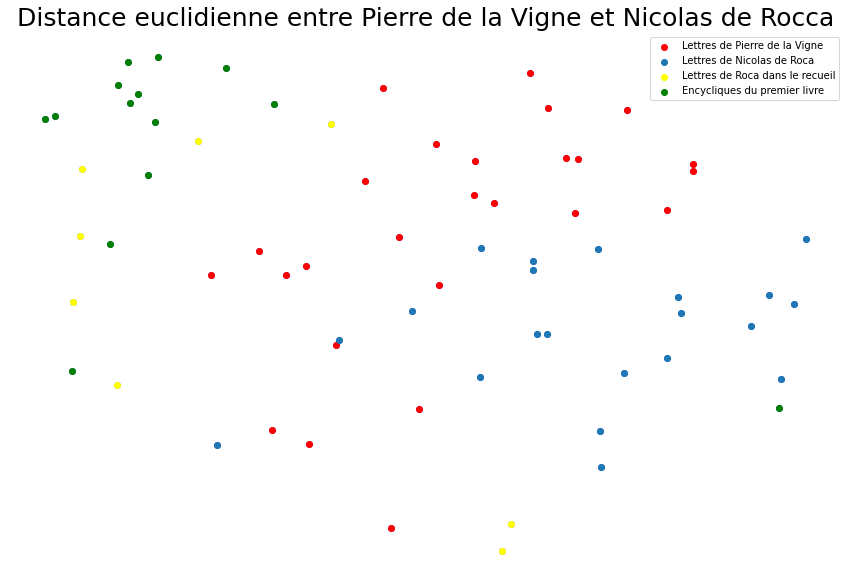

In [258]:
corpus_rocca = ' '.join(rocca['text'].tolist()).split()
corpus_pdv = ' '.join(pdv['text'].tolist()).split()
print(corpus_pdv)


step = 200
sublist_size = 200

corpus_pdv = [corpus_pdv[i:i+sublist_size] for i in range(0, len(corpus_pdv), step)]
corpus_pdv = [' '.join(sublist) for sublist in corpus_pdv]
corpus_rocca = [corpus_rocca[i:i+sublist_size] for i in range(0, len(corpus_rocca), step)]
corpus_rocca = [' '.join(sublist) for sublist in corpus_rocca]



corpus = corpus_pdv + corpus_rocca + newdf['text'].tolist() + encycliques['text'].tolist()

vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
matrix_pdv = tfidf_matrix.toarray()
euclidean_distance_matrix = pairwise_distances(matrix_pdv, metric='euclidean')
tsne = TSNE(n_components=2, random_state=42)
euclidian_tsne = tsne.fit_transform(euclidean_distance_matrix)

pdv = list(range(0,26))
rocca = list(range(26,47))
test = list(range(47,55))
deux = list(range(55,len(corpus)))



# Visualization
plt.figure(figsize=(15, 10))
plt.scatter(euclidian_tsne[:, 0], euclidian_tsne[:, 1], color='blue', alpha=0.5)  # All points in blue with some transparency

highlighted_pdv = plt.scatter(euclidian_tsne[pdv, 0], euclidian_tsne[pdv, 1], color='red', marker='o', label='Lettres de Pierre de la Vigne')

highlighted_rocca = plt.scatter(euclidian_tsne[rocca, 0], euclidian_tsne[rocca, 1], marker='o', label='Lettres de Nicolas de Roca')

highlighted_test = plt.scatter(euclidian_tsne[test, 0], euclidian_tsne[test, 1], color='yellow',marker='o', label='Lettres de Roca dans le recueil')

highlighted_deux = plt.scatter(euclidian_tsne[deux, 0], euclidian_tsne[deux, 1], color='green',marker='o', label='Encycliques du premier livre')


plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Distance euclidienne entre Pierre de la Vigne et Nicolas de Rocca',fontsize=25)
plt.legend()
plt.axis('off')
plt.savefig('tsne_pdv_roca_mots.png',dpi=300)

plt.show()

In [216]:
len(corpus_rocca)

21

# Test avec les lemmes et split de 200 mots + tfidf

In [8]:
pdv = pd.read_excel('pdv.xlsx')
pdv.pop('Unnamed: 0')
pdv['lemma'] = pdv['lemma'].apply(string_to_list).apply(join).apply(stopwords).apply(join)

rocca = pd.read_excel('rocca.xlsx')
rocca.pop('Unnamed: 0')
rocca['lemma'] = rocca['lemma'].apply(string_to_list).apply(join).apply(stopwords).apply(join)

22 18


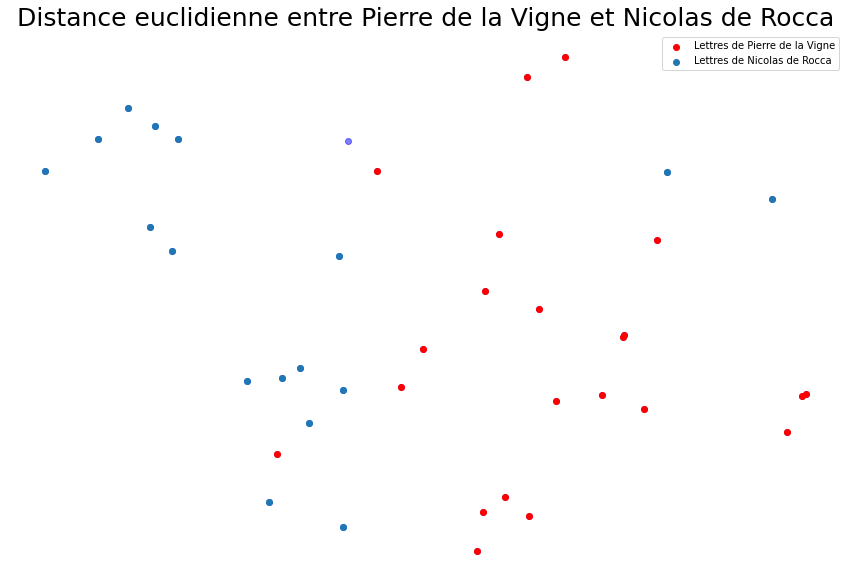

In [9]:
corpus_rocca_lemma = ' '.join(rocca['lemma'].tolist()).split()
corpus_pdv_lemma = ' '.join(pdv['lemma'].tolist()).split()


step = 200
sublist_size = 200

corpus_pdv_lemma = [corpus_pdv_lemma[i:i+sublist_size] for i in range(0, len(corpus_pdv_lemma), step)]
corpus_pdv_lemma = [' '.join(sublist) for sublist in corpus_pdv_lemma]
corpus_rocca_lemma = [corpus_rocca_lemma[i:i+sublist_size] for i in range(0, len(corpus_rocca_lemma), step)]
corpus_rocca_lemma = [' '.join(sublist) for sublist in corpus_rocca_lemma]

corpus_lemma = corpus_pdv_lemma + corpus_rocca_lemma

print(len(corpus_pdv_lemma),len(corpus_rocca_lemma))

vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(corpus_lemma)
feature_names = vectorizer.get_feature_names_out()
matrix_pdv = tfidf_matrix.toarray()
euclidean_distance_matrix = pairwise_distances(matrix_pdv, metric='euclidean')
tsne = TSNE(n_components=2, random_state=42)
euclidian_tsne = tsne.fit_transform(euclidean_distance_matrix)

pdv = list(range(0,22))
rocca = list(range(23,len(corpus_lemma)))



# Visualization
plt.figure(figsize=(15, 10))
plt.scatter(euclidian_tsne[:, 0], euclidian_tsne[:, 1], color='blue', alpha=0.5)  # All points in blue with some transparency

highlighted_pdv = plt.scatter(euclidian_tsne[pdv, 0], euclidian_tsne[pdv, 1], color='red', marker='o', label='Lettres de Pierre de la Vigne')

highlighted_rocca = plt.scatter(euclidian_tsne[rocca, 0], euclidian_tsne[rocca, 1], marker='o', label='Lettres de Nicolas de Rocca')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Distance euclidienne entre Pierre de la Vigne et Nicolas de Rocca',fontsize=25)
plt.legend()
plt.axis('off')
plt.savefig('tsne_pdv_roca_lemma.png',dpi=300)


plt.show()

# Data augmentation pour créer un modèle

In [10]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

2023-08-11 21:28:27.497028: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 21:28:27.790220: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-11 21:28:27.830567: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-11 21:28:27.830585: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [11]:
def delete_portion(text, start_percentage, end_percentage):
    total_length = len(text)
    
    start_index = int(total_length * start_percentage)
    end_index = int(total_length * (1 - end_percentage))
    
    deleted_portion = text[start_index:end_index]
    return deleted_portion
def divide_text(text):
    total_length = len(text)
    part_length = total_length // 3
    
    part1 = text[:part_length]
    part2 = text[part_length:2 * part_length]
    part3 = text[2 * part_length:]
    
    return part1, part2, part3
aug = nac.KeyboardAug()

In [12]:
pdv = pd.read_excel('pdv.xlsx')
pdv.pop('Unnamed: 0')
pdv['lemma'] = pdv['lemma'].apply(string_to_list).apply(join).apply(stopwords).apply(join)

rocca = pd.read_excel('rocca.xlsx')
rocca.pop('Unnamed: 0')
rocca['lemma'] = rocca['lemma'].apply(string_to_list).apply(join).apply(stopwords).apply(join)

In [13]:
corpus_rocca = rocca['text'].tolist()
corpus_pdv = pdv['text'].tolist()

In [14]:
rocca['symetry'] = rocca['text'].apply(lambda x: delete_portion(x, 0.05, 0.05))
rocca[['part1', 'part2', 'part3']] = rocca['text'].apply(divide_text).apply(pd.Series)
rocca['keyboard_aug'] = rocca['text'].apply(lambda x: aug.augment(x)).apply(join)

pdv['symetry'] = pdv['text'].apply(lambda x: delete_portion(x, 0.05, 0.05))
pdv[['part1', 'part2', 'part3']] = pdv['text'].apply(divide_text).apply(pd.Series)
pdv['keyboard_aug'] = pdv['text'].apply(lambda x: aug.augment(x)).apply(join)

In [15]:
pierre = pdv['text'].tolist() + pdv['part1'].tolist() + pdv['part1'].tolist() + pdv['part2'].tolist() + pdv['part3'].tolist()+pdv['keyboard_aug'].tolist()

nico = rocca['text'].tolist() + rocca['part1'].tolist() + rocca['part1'].tolist() + rocca['part2'].tolist() + rocca['part3'].tolist()

In [16]:
corpus_rocca = ' '.join(rocca['text'].tolist()).split()
corpus_rocca = [corpus_rocca[i:i+sublist_size] for i in range(0, len(corpus_rocca), step)]
corpus_rocca = [' '.join(sublist) for sublist in corpus_rocca]
df_rocca = pd.DataFrame({'text':corpus_rocca})

In [17]:
df_rocca['symetry'] = df_rocca['text'].apply(lambda x: delete_portion(x, 0.05, 0.05))
df_rocca[['part1', 'part2', 'part3']] = df_rocca['text'].apply(divide_text).apply(pd.Series)
df_rocca['keyboard_aug'] = df_rocca['text'].apply(lambda x: aug.augment(x)).apply(join)

In [18]:
nicolas = df_rocca['text'].tolist() + df_rocca['symetry'].tolist()+ df_rocca['part1'].tolist() + df_rocca['part2'].tolist() + df_rocca['part3'].tolist() + df_rocca['keyboard_aug'].tolist()

In [103]:
print(len(nicolas))
print(len(pierre))

tim = pd.DataFrame({'text':pierre,'indice':0})
viv = pd.DataFrame({'text':nicolas,'indice':1})

noe = pd.concat([tim,viv],axis=0)

126
162


Catégorie =  [0]
Accuracy: 0.9305555555555556
[[41  0]
 [ 5 26]]


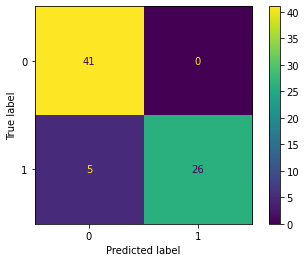

In [234]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, f1_score

texts = noe['text'].tolist()
labels = noe['indice'].tolist()

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(texts)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)

# Create and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

#test

new_vect = tfidf_vectorizer.transform([newdf['text'][7]])
predict = random_forest.predict(new_vect)
print('Catégorie = ',predict)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

matrix_text = metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [102]:
precision = 0.93
recall = 1
f1 = 2*precision*recall / (precision+recall)
f1

0.9637305699481865

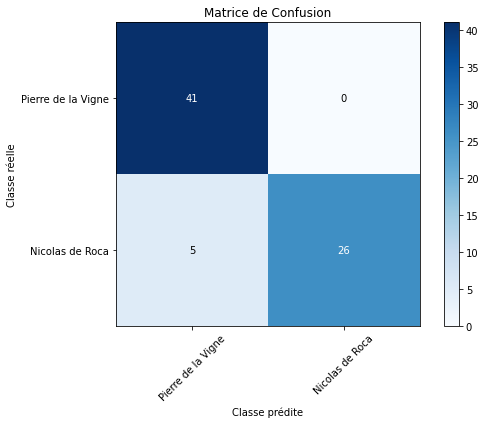

In [97]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.colorbar()

classes = ['Pierre de la Vigne', 'Nicolas de Roca']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Classe réelle')
plt.xlabel('Classe prédite')
plt.tight_layout()
plt.savefig('confusion_matrix.png',dpi=300)

plt.show()

# Test

In [69]:
import string

In [71]:
translator = str.maketrans('','',string.punctuation)

def remove_punct(sentence):
    return sentence.translate(translator)

In [134]:
def length(text):
    return len(text.split())

In [262]:
def split(sentence):
    return sentence.split()

In [388]:
file = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/PDV_grams.xlsx'

In [389]:
df = pd.read_excel(file)
df.pop('Unnamed: 0')
df.pop('Unnamed: 0.1')
print('ok')

ok


In [390]:
indices = [136,181,198,215,216,331,336,339]
newdf = df.loc[indices]

indexes = [0,1,2,3,4,7,8,10,19,20,27,28,29,31]
encycliques = df.loc[indexes]

In [391]:
newdf = newdf[['Livre','Numéro de la charte','Date','textes','lemma']].reset_index()
newdf['text'] = newdf['textes'].apply(lower).apply(remove_punct)

encycliques = encycliques[['Livre','Numéro de la charte','Date','textes','lemma']].reset_index()
encycliques['text'] = encycliques['textes'].apply(lower).apply(remove_punct)
encycliques['indice'] = 0
encycliques = encycliques[['text','indice']]
encycliques['len'] = encycliques['text'].apply(length)

In [392]:
newdf['indice'] = 1
newdf = newdf[['text','indice']]
newdf['len'] = newdf['text'].apply(length)


In [393]:
encycliques['split'] = encycliques['text'].apply(split)
liste = encycliques['split'].tolist()
flattened_list = [item for sublist in liste for item in sublist]
step = 200
sublist_size = 200

encyclique = [flattened_list[i:i+sublist_size] for i in range(0, len(flattened_list), step)]
encyclique = [' '.join(sublist) for sublist in encyclique]

livre = pd.DataFrame({'text':encyclique,'indice':0})

livre['symetry'] = livre['text'].apply(lambda x: delete_portion(x, 0.05, 0.05))
livre[['part1', 'part2', 'part3']] = livre['text'].apply(divide_text).apply(pd.Series)
livre['keyboard_aug'] = livre['text'].apply(lambda x: aug.augment(x)).apply(join)

In [447]:
newdf['split'] = newdf['text'].apply(split)
liste_2 = newdf['split'].tolist()
flattened_list_2 = [item for sublist in liste_2 for item in sublist]
step = 200
sublist_size = 200

roca = [flattened_list_2[i:i+sublist_size] for i in range(0, len(flattened_list_2), step)]
roca = [' '.join(sublist) for sublist in roca]
print(len(roca))

damien = pd.DataFrame({'text':roca,'indice':0})

damien['symetry'] = damien['text'].apply(lambda x: delete_portion(x, 0.05, 0.05))
damien[['part1', 'part2', 'part3']] = damien['text'].apply(divide_text).apply(pd.Series)
damien['keyboard_aug'] = damien['text'].apply(lambda x: aug.augment(x)).apply(join)

15


In [448]:
damien = newdf['text'].tolist() + damien['text'].tolist() + damien['symetry'].tolist() + damien['part1'].tolist() + damien['part2'].tolist() + damien['part3'].tolist() + damien['keyboard_aug'].tolist()

pauline = encycliques['text'].tolist() + livre['text'].tolist() + livre['symetry'].tolist() + livre['part1'].tolist() + livre['part2'].tolist() + livre['part3'].tolist() + livre['keyboard_aug'].tolist()
taille = len(pauline) //3
pauline = pauline[:taille]

In [449]:
leah = pd.DataFrame({'text':pauline,'indice':0})
tristan = pd.DataFrame({'text':damien,'indice':1})

In [450]:
noe = pd.concat([leah,tristan],axis=0)

 Texte 0 =  [0]
 Texte 1 =  [0]
 Texte 2 =  [0]
 Texte 3 =  [0]
 Texte 4 =  [0]
 Texte 5 =  [0]
 Texte 6 =  [0]
 Texte 7 =  [0]
 Texte 8 =  [1]
 Texte 9 =  [0]
 Texte 10 =  [0]
 Texte 11 =  [0]
 Texte 12 =  [1]
 Texte 13 =  [1]
 Texte 14 =  [0]
 Texte 15 =  [0]
 Texte 16 =  [0]
 Texte 17 =  [0]
 Texte 18 =  [0]
 Texte 19 =  [0]
 Texte 20 =  [1]
 Texte 21 =  [1]
 Texte 22 =  [1]
 Texte 23 =  [0]
 Texte 24 =  [0]
 Texte 25 =  [0]
 Texte 26 =  [0]
 Texte 27 =  [0]
 Texte 28 =  [0]
 Texte 29 =  [1]
 Texte 30 =  [0]
 Texte 31 =  [0]
 Texte 32 =  [0]
 Texte 33 =  [0]
 Texte 34 =  [0]
 Texte 35 =  [0]
 Texte 36 =  [1]
 Texte 37 =  [0]
 Texte 38 =  [0]
 Texte 39 =  [1]
 Texte 40 =  [1]
 Texte 41 =  [0]
 Texte 42 =  [1]
 Texte 43 =  [0]
 Texte 44 =  [1]
 Texte 45 =  [0]
 Texte 46 =  [0]
 Texte 47 =  [1]
 Texte 48 =  [1]
 Texte 49 =  [0]
 Texte 50 =  [0]
Accuracy: 0.9814814814814815
[[26  1]
 [ 0 27]]


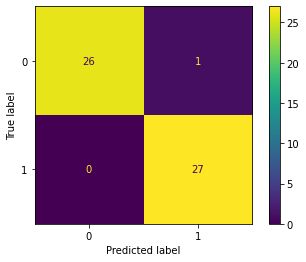

In [497]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, f1_score

texts = noe['text'].tolist()
labels = noe['indice'].tolist()

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(texts)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)

# Create and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

#test
results = []

for i in range(len(bo)):
    new_vect = tfidf_vectorizer.transform([bo['text'][i]])
    predict = random_forest.predict(new_vect)
    print(f' Texte {i} = ',predict)
    results.append(predict)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

matrix_text = metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

116 98
214


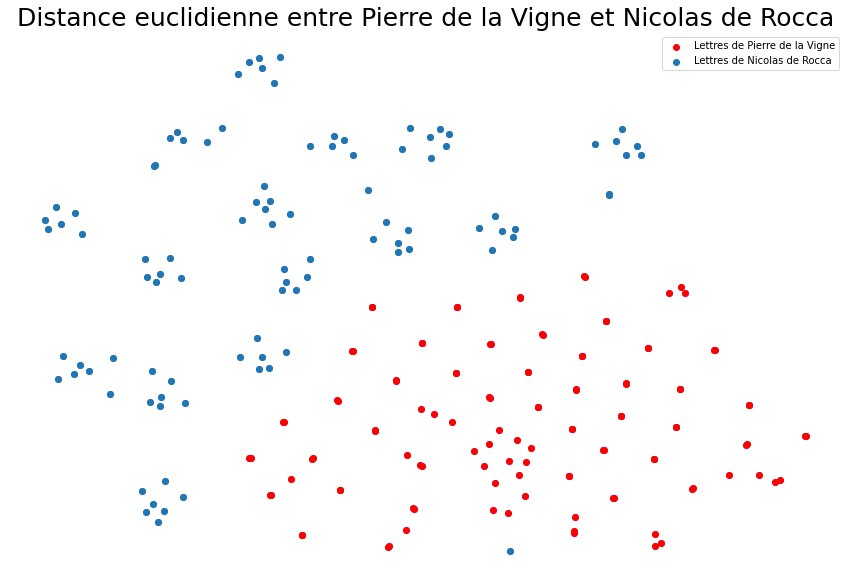

In [460]:
corpus = noe['text'].tolist()
labels = noe['indice'].tolist()

print(len(leah['text'].tolist()),len(tristan['text'].tolist()))
print(len(corpus))

vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
matrix_pdv = tfidf_matrix.toarray()
euclidean_distance_matrix = pairwise_distances(matrix_pdv, metric='euclidean')
tsne = TSNE(n_components=2, random_state=42)
euclidian_tsne = tsne.fit_transform(euclidean_distance_matrix)

pdv = list(range(0,116))
rocca = list(range(116,len(corpus)))



# Visualization
plt.figure(figsize=(15, 10))
plt.scatter(euclidian_tsne[:, 0], euclidian_tsne[:, 1], color='blue', alpha=0.5)  # All points in blue with some transparency

highlighted_pdv = plt.scatter(euclidian_tsne[pdv, 0], euclidian_tsne[pdv, 1], color='red', marker='o', label='Lettres de Pierre de la Vigne')

highlighted_rocca = plt.scatter(euclidian_tsne[rocca, 0], euclidian_tsne[rocca, 1], marker='o', label='Lettres de Nicolas de Rocca')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Distance euclidienne entre Pierre de la Vigne et Nicolas de Rocca',fontsize=25)
plt.legend()
plt.axis('off')

plt.savefig('pdv_roca_recueil.png',dpi=300)

plt.show()

In [467]:
précision = 0.98
rappel = 1

((2*précision*rappel)/(précision+rappel))

0.98989898989899

In [485]:
indices = [17,18,23,41,49,53,55,56,57,58,59,61,62,63,64,65,66,77,78,101,103,104,105,107,111,113,114,115,118,126,138,168,169,170,173,196,197,
          214,226,297,323,324,332,333,334,335,338,341,343,351,353]
bo = df.loc[indices].reset_index()

In [487]:
bo = bo[['index','Livre','Numéro de la charte','textes']]

In [489]:
bo['text'] = bo['textes'].apply(lower).apply(remove_punct)

/tmp/ipykernel_9346/3699264688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bo['text'] = bo['textes'].apply(lower).apply(remove_punct)


In [499]:
final = [array[0] for array in results]

In [503]:
Counter(final)

Counter({0: 37, 1: 14})